In [37]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Creating a Table from Scratch ##

In [38]:
Table

In [45]:
colleges = make_array('CICS', 'CNS', 'Engineering',"HFA", "SBS","Management")
umass = Table().with_column('Colleges', colleges)
umass

Colleges
CICS
CNS
Engineering
HFA
SBS
Management


In [43]:
#Add another column "manually"
enrollments = make_array(1110,6446,2202,1808,4018,3582)
umass = umass.with_column('Enrollment',enrollments)
umass

Colleges,Enrollment
CICS,1110
CNS,6446
Engineering,2202
HFA,1808
SBS,4018
Management,3582


In [51]:
enrollments = make_array(1110,6446,2202,1808,4018,3582)
umass = umass.with_column('Enrollment',enrollments)


In [52]:
umass

Colleges,Enrollment
CICS,1110
CNS,6446
Engineering,2202
HFA,1808
SBS,4018
Management,3582


In [53]:
#Create a table wiht two columns "at the same time"
new_umass = Table().with_columns('Colleges', colleges, 
                                 'Enrollment',enrollments)
new_umass

Colleges,Enrollment
CICS,1110
CNS,6446
Engineering,2202
HFA,1808
SBS,4018
Management,3582


## Reading a Table from a File  ##

In [54]:
#create a table from a csv
minard = Table.read_table('minard.csv')
minard

Longitude,Latitude,City,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


## Accessing a Column as an Array ##

In [55]:
minard.column('Survivors')#notice we have extracted the array

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [58]:
minard.select('Survivors')#notice we have a new table

Survivors
145000
140000
127100
100000
55000
24000
20000
12000


In [59]:
minard.column(4)

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [60]:
initial = minard.column(4).item(0)
initial

145000

In [61]:
proportion_surviving = minard.column(4) / initial#notice you are dividing each element of the array by initial
proportion_surviving

array([1.        , 0.96551724, 0.87655172, 0.68965517, 0.37931034,
       0.16551724, 0.13793103, 0.08275862])

## Extending a Table with a New Column ##

In [64]:
minard = minard.with_column('Percent Surviving', proportion_surviving)#add calculated column abot to table
minard

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,1
33.2,54.9,Dorogobouge,Advance,140000,0.965517
34.4,55.5,Chjat,Advance,127100,0.876552
37.6,55.8,Moscou,Advance,100000,0.689655
34.3,55.2,Wixma,Retreat,55000,0.37931
32,54.6,Smolensk,Retreat,24000,0.165517
30.4,54.4,Orscha,Retreat,20000,0.137931
26.8,54.3,Moiodexno,Retreat,12000,0.0827586


In [65]:
minard.set_format(5, PercentFormatter)#format it nicer

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [66]:
minard.column(5)#notice format does nor change data inside the array

array([1.        , 0.96551724, 0.87655172, 0.68965517, 0.37931034,
       0.16551724, 0.13793103, 0.08275862])

In [67]:
minard.labels#get list of column names

('Longitude',
 'Latitude',
 'City',
 'Direction',
 'Survivors',
 'Percent Surviving')

In [68]:
minard.relabeled('Percent Surviving', 'Percent of Survivors')#change column names

Longitude,Latitude,City,Direction,Survivors,Percent of Survivors
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [69]:
minard.num_columns#how many columns?

6

In [70]:
minard.num_rows#how many rows?

8

## Working with Columns ##

In [71]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2015,8.43,11128.5,702,Star Wars: The Force Awakens
2014,8.17,10360.8,702,American Sniper
2013,8.13,10923.6,688,Catching Fire
2012,7.96,10837.4,667,The Avengers
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,7.89,10565.6,536,Toy Story 3
2009,7.5,10595.5,521,Avatar
2008,7.18,9630.7,608,The Dark Knight
2007,6.88,9663.8,631,Spider-Man 3
2006,6.55,9209.5,608,Dead Man's Chest


In [72]:
estimated_num_tickets = movies.column('Total Gross') * (10 ** 6) / movies.column('Average Ticket Price')#create new column

In [73]:
movies = movies.with_column('Estimated Tickets', estimated_num_tickets)#append new column to table
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,1.32011e+09
2014,8.17,10360.8,702,American Sniper,1.26815e+09
2013,8.13,10923.6,688,Catching Fire,1.34362e+09
2012,7.96,10837.4,667,The Avengers,1.36148e+09
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),1.28301e+09
2010,7.89,10565.6,536,Toy Story 3,1.33911e+09
2009,7.5,10595.5,521,Avatar,1.41273e+09
2008,7.18,9630.7,608,The Dark Knight,1.34132e+09
2007,6.88,9663.8,631,Spider-Man 3,1.40462e+09
2006,6.55,9209.5,608,Dead Man's Chest,1.40603e+09


In [74]:
movies.set_format('Estimated Tickets', NumberFormatter)#change format

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2010,7.89,10565.6,536,Toy Story 3,"1,339,112,801.01"
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"
2008,7.18,9630.7,608,The Dark Knight,"1,341,323,119.78"
2007,6.88,9663.8,631,Spider-Man 3,"1,404,622,093.02"
2006,6.55,9209.5,608,Dead Man's Chest,"1,406,030,534.35"


In [78]:
new = movies.select('Year', 'Estimated Tickets')
new

Year,Estimated Tickets
2015,"1,320,106,761.57"
2014,"1,268,151,774.79"
2013,"1,343,616,236.16"
2012,"1,361,482,412.06"
2011,"1,283,013,871.37"
2010,"1,339,112,801.01"
2009,"1,412,733,333.33"
2008,"1,341,323,119.78"
2007,"1,404,622,093.02"
2006,"1,406,030,534.35"


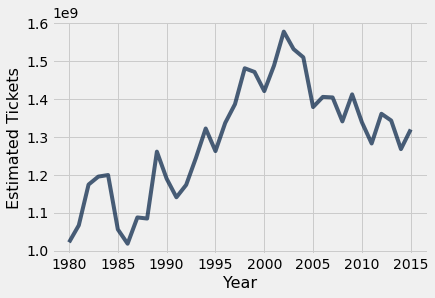

In [75]:
movies.plot('Year', 'Estimated Tickets')#make a simple plot

## Rows ##

In [79]:
movies.where('Year', are.between(2000, 2005))#return rows given a condition

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2004,6.21,9380.5,551,Shrek 2,"1,510,547,504.03"
2003,6.03,9239.7,506,Return of the King,"1,532,288,557.21"
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"
2000,5.39,7661,478,The Grinch,"1,421,335,807.05"


In [80]:
movies.where('#1 Movie', are.equal_to('Avatar'))#return rows given a condition

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"


In [81]:
movies.where('#1 Movie', 'Avatar')#return rows given a condition

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"


In [94]:
movies.where('#1 Movie', are.containing('Harry') | are.containing('Force'))#return rows given a condition

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"


In [95]:
movies.where('Number of Movies', are.below(450))#return rows given a condition

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
1995,4.35,5493.5,411,Toy Story,"1,262,873,563.22"
1990,4.22,5021.8,410,Home Alone,"1,190,000,000.00"
1982,2.94,3453,428,E.T.,"1,174,489,795.92"
1981,2.78,2966,173,Raiders / Lost Ark,"1,066,906,474.82"
1980,2.69,2749,161,The Empire Strikes Back,"1,021,933,085.50"


In [96]:
movies.where('Year', are.above(2010))#return rows given a condition

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"


In [97]:
movies.take(3)#return rows by position (2nd row, 3rd row, etc.)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"


In [98]:
movies.take(np.arange(4))#return range of rows by position rows given a condition

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
